# Exploração e Análise de Dados (EDA)


Este notebook tem como objetivo analisar os principais fatores associados ao risco de crédito, utilizando variáveis categóricas em sua forma original, antes da aplicação de técnicas de codificação.

A análise é conduzida sempre em função da variável alvo (`target`),
onde:
- 0 → adimplente
- 1 → inadimplente

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [2]:
df = pd.read_csv(
    "../data/raw/german_data.csv",
    sep=r"\s+",
    header=None,
    engine="python"
)

df.columns = [
     "status_checking_account",
    "duration_months",
    "credit_history",
    "purpose",
    "credit_amount",
    "savings_account",
    "employment_since",
    "installment_rate",
    "personal_status_sex",
    "other_debtors",
    "residence_since",
    "property",
    "age",
    "other_installment_plans",
    "housing",
    "existing_credits",
    "job",
    "num_dependents",
    "telephone",
    "foreign_worker",
    "target"
]

In [3]:
df["target"] = df["target"].map({1: 0, 2: 1})

In [17]:
with pd.option_context(
    "display.max_columns", None,
    "display.width", 1000
):
    display(df.head())

,status_checking_account,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,residence_since,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1


In [4]:
target_dist = (
    df["target"]
    .value_counts(normalize=True)
    .reset_index()
)
target_dist.columns = ["Classe", "Proporcao"]

target_dist

,Classe,Proporcao
0,0,0.7
1,1,0.3


In [5]:
target_dist["Classe_label"] = target_dist["Classe"].map({0: "Adimplente", 1: "Inadimplente"})

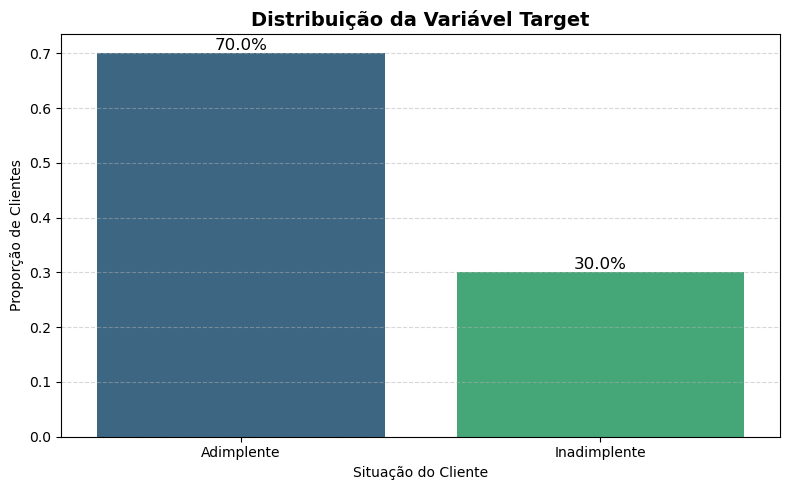

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(
    data=target_dist,
    x="Classe_label",
    y="Proporcao",
    hue="Classe_label",
    palette="viridis",
    legend=False,
    ax=ax
)

ax.set_title("Distribuição da Variável Target", fontsize=14, weight="bold")
ax.set_xlabel("Situação do Cliente")
ax.set_ylabel("Proporção de Clientes")
ax.grid(axis="y", linestyle="--", alpha=0.5)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1%}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=12
    )

plt.tight_layout()
plt.show()

Observa-se que a base apresenta predominância de adimplentes, com aproximadamente 70% dos clientes classificados como baixo risco.
Esse desbalanceamento é comum em problemas de risco de crédito e será considerado nas etapas de modelagem.

## Análise das Variáveis Categóricas

Nesta seção, analisamos variáveis categóricas em relação à inadimplência. A análise é feita em termos de proporção, permitindo comparar o comportamento de adimplentes e inadimplentes dentro de cada categoria.

In [7]:
def eda_categorica_target(
    df,
    coluna,
    target="target",
    label_map=None,
    titulo_coluna=None
):
    """
    Gera análise exploratória de uma variável categórica
    em função da variável target, utilizando proporções
    e gráficos de barras empilhadas.
    """

    # 1. Tabela de proporções
    tabela = (
        pd.crosstab(df[coluna], df[target], normalize="index")
        .reset_index()
    )

    # 2. Renomear colunas
    tabela.columns = [coluna, "Adimplente", "Inadimplente"]

    # 3. Aplicar labels (se existirem)
    if label_map:
        tabela[coluna] = tabela[coluna].map(label_map)

    # 4. Transformar para formato longo
    tabela_long = tabela.melt(
        id_vars=coluna,
        value_vars=["Adimplente", "Inadimplente"],
        var_name="Classe",
        value_name="Proporcao"
    )

    # 5. Plot
    fig, ax = plt.subplots(figsize=(10, 7))

    sns.barplot(
        data=tabela_long,
        x=coluna,
        y="Proporcao",
        hue="Classe",
        palette="viridis",
        ax=ax
    )

    ax.set_title(f"{titulo_coluna} vs Risco de Crédito", fontsize=14, weight="bold")
    ax.set_xlabel(titulo_coluna)
    ax.set_ylabel("Proporção")
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    # 6. Anotar valores
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.1%}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="bottom",
            fontsize=11
        )

    if titulo_coluna is None:
        titulo_coluna = coluna.replace("_", " ").title()

    plt.xticks(rotation=60, ha="right")
    plt.tight_layout()
    plt.show()

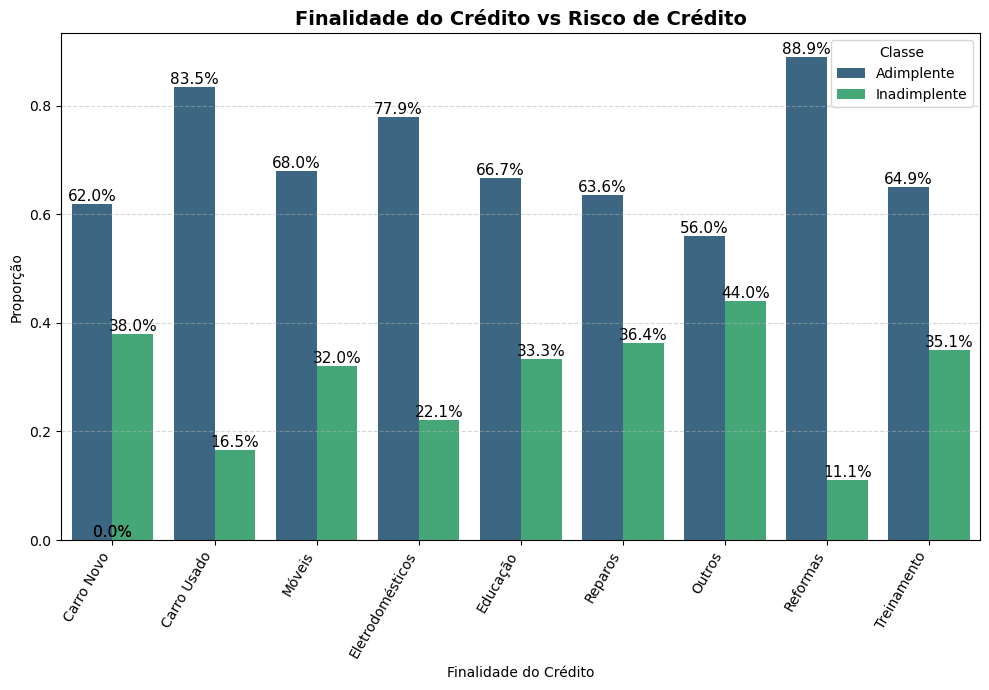

In [8]:
purpose_labels = {
    "A40": "Carro Novo",
    "A41": "Carro Usado",
    "A42": "Móveis",
    "A43": "Eletrodomésticos",
    "A44": "Educação",
    "A45": "Reparos",
    "A46": "Outros",
    "A47": "Negócios",
    "A48": "Reformas",
    "A49": "Treinamento"
}

eda_categorica_target(
    df,
    coluna="purpose",
    label_map=purpose_labels,
    titulo_coluna="Finalidade do Crédito"
)

### Finalidade do Crédito × Risco de Crédito

**Insight principal:**  
A finalidade do crédito apresenta forte relação com o risco de inadimplência. Observa-se maior proporção de inadimplentes nas categorias *Outros* e *Carro Novo*, enquanto *Reformas* e *Carro Usado* apresentam perfis significativamente mais adimplentes.

**Implicações para o modelo:**  
- A variável *Finalidade do Crédito* possui poder discriminativo relevante  
- Deve ser mantida como feature categórica no modelo  
- Pode se beneficiar de técnicas como target encoding ou one-hot encoding

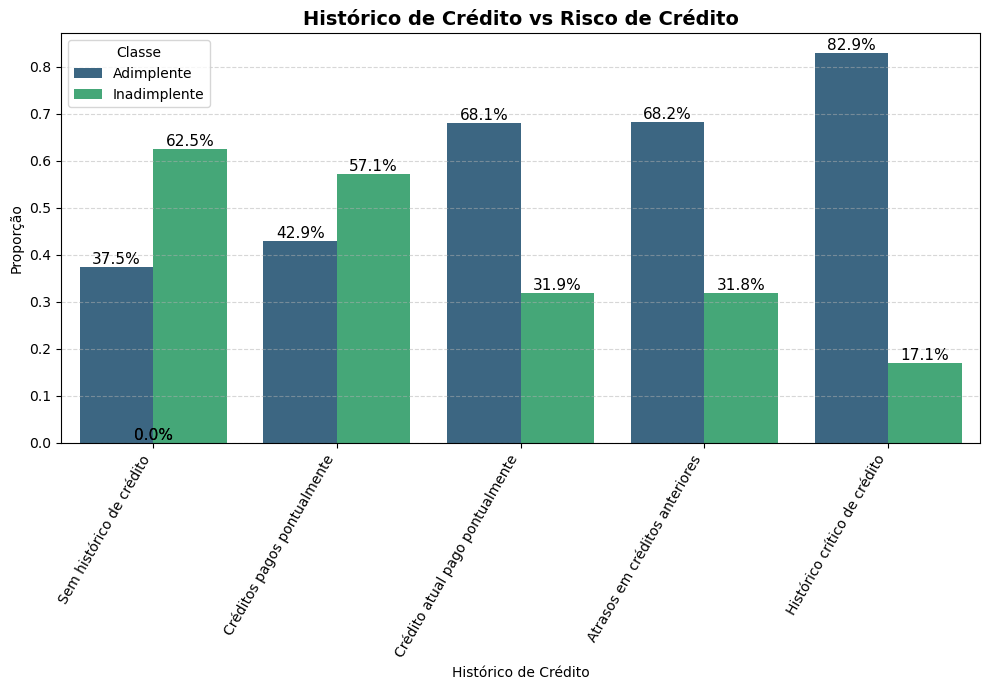

In [9]:
credit_history_labels = {
    "A30": "Sem histórico de crédito",
    "A31": "Créditos pagos pontualmente",
    "A32": "Crédito atual pago pontualmente",
    "A33": "Atrasos em créditos anteriores",
    "A34": "Histórico crítico de crédito"
}

eda_categorica_target(
    df,
    coluna="credit_history",
    label_map=credit_history_labels,
    titulo_coluna="Histórico de Crédito"
)

### Histórico de Crédito × Risco de Crédito

**Insight principal:**  
O histórico de crédito é uma das variáveis com maior poder discriminativo em relação ao risco. Clientes com histórico de crédito positivo apresentam proporção significativamente maior de adimplência, enquanto históricos negativos ou inexistentes estão fortemente associados à inadimplência.

**Implicações para o modelo:**  
- Variável altamente informativa para predição de risco  
- Forte candidata a feature principal do modelo  
- Deve ser mantida e analisada com cuidado para evitar vazamento de informação

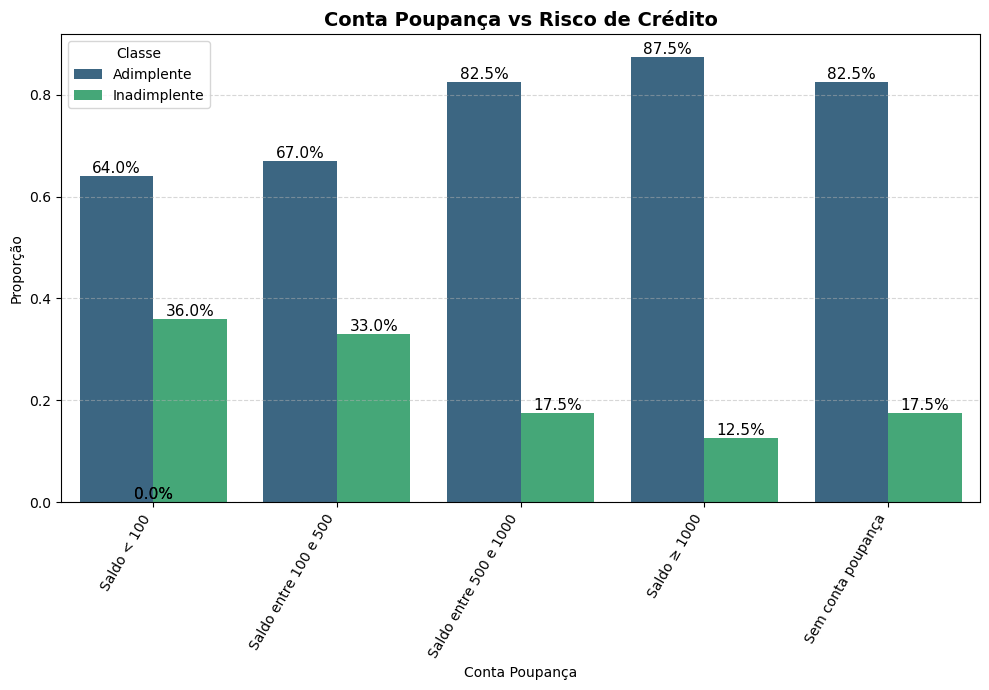

In [10]:
savings_account_labels = {
    "A61": "Saldo < 100",
    "A62": "Saldo entre 100 e 500",
    "A63": "Saldo entre 500 e 1000",
    "A64": "Saldo ≥ 1000",
    "A65": "Sem conta poupança"
}

eda_categorica_target(
    df,
    coluna="savings_account",
    label_map=savings_account_labels,
    titulo_coluna="Conta Poupança"
)

### Conta Poupança × Risco de Crédito

**Insight principal:**  
Observa-se uma relação clara entre o nível de recursos na conta poupança e o risco de crédito. Clientes sem poupança ou com saldo baixo apresentam maior proporção de inadimplência, enquanto faixas mais elevadas de poupança estão associadas a maior adimplência.

**Implicações para o modelo:**  
- Variável relevante para capturar capacidade financeira do cliente  
- Pode apresentar relação monotônica com o risco  
- Avaliar encoding ordinal para preservar a ordem implícita das categorias

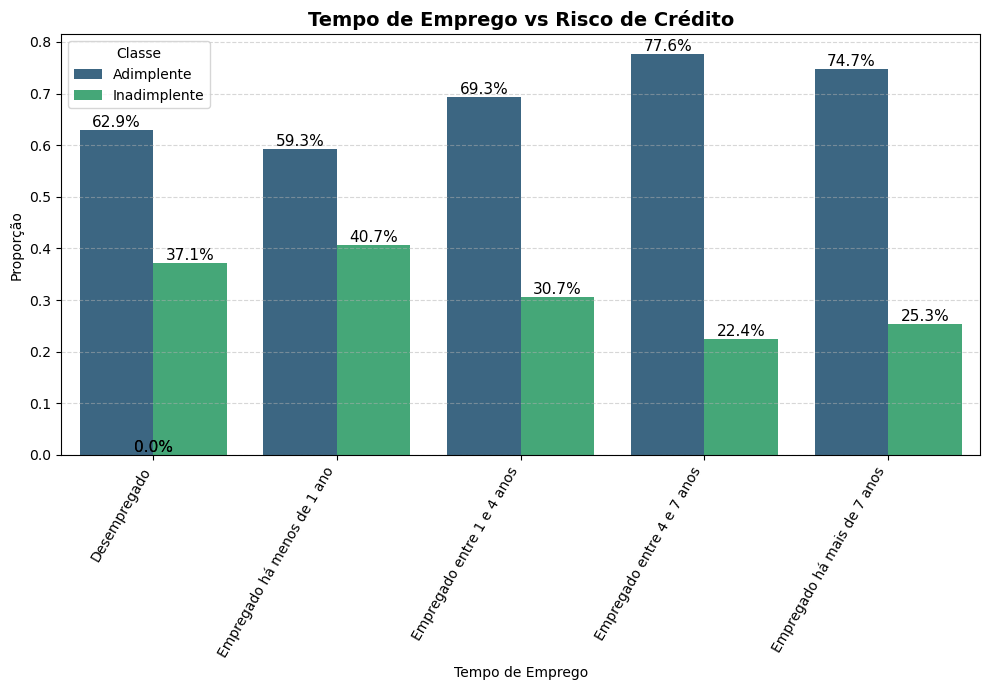

In [12]:
employment_since_labels = {
    "A71": "Desempregado",
    "A72": "Empregado há menos de 1 ano",
    "A73": "Empregado entre 1 e 4 anos",
    "A74": "Empregado entre 4 e 7 anos",
    "A75": "Empregado há mais de 7 anos"
}

eda_categorica_target(
    df,
    coluna="employment_since",
    label_map=employment_since_labels,
    titulo_coluna="Tempo de Emprego"
)

### Tempo de Emprego × Risco de Crédito

**Insight principal:**  
O tempo de emprego demonstra associação com o risco de crédito. Clientes com vínculos empregatícios mais longos tendem a apresentar maior adimplência, enquanto períodos curtos ou ausência de emprego estão relacionados a maior inadimplência.

**Implicações para o modelo:**  
- Variável importante para representar estabilidade financeira  
- Pode ser tratada como categórica ordinal  
- Avaliar impacto de agrupamento de categorias com baixa frequência

## Análise das Variáveis Numéricas

In [20]:
def eda_numerica_target(
    df,
    coluna,
    target="target",
    titulo_coluna=None
):
    """
    Gera boxplot de uma variável numérica
    comparando bons e maus pagadores.
    """

    # Definir título legível
    if titulo_coluna is None:
        titulo_coluna = coluna.replace("_", " ").title()

    # Criar rótulos do target
    df_plot = df.copy()
    df_plot["Classe"] = df_plot[target].map(
        {0: "Adimplente", 1: "Inadimplente"}
    )

    # Plot
    fig, ax = plt.subplots(figsize=(8, 5))

    sns.boxplot(
        data=df_plot,
        x="Classe",
        y=coluna,
        hue="Classe",
        palette="viridis",
        legend=False,
        ax=ax
    )

    ax.set_title(
        f"{titulo_coluna} por Situação do Cliente",
        fontsize=14,
        weight="bold"
    )
    ax.set_xlabel("Situação do Cliente")
    ax.set_ylabel(titulo_coluna)
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    plt.tight_layout()
    plt.show()

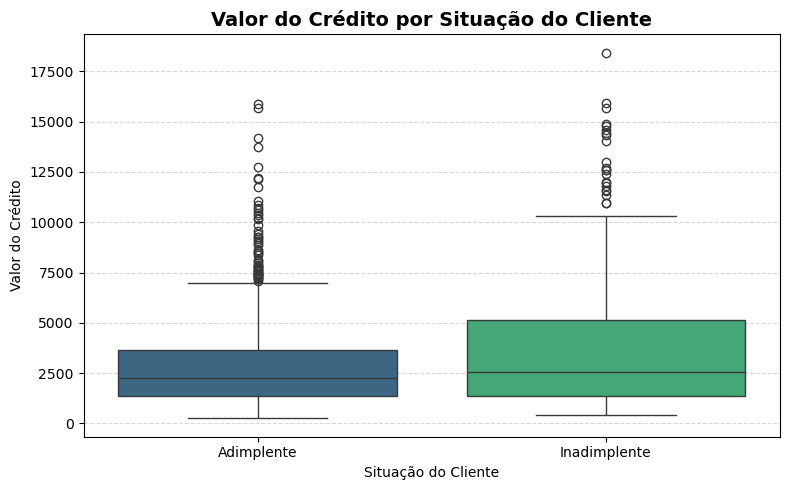

In [21]:
eda_numerica_target(
    df,
    coluna="credit_amount",
    titulo_coluna="Valor do Crédito"
)

### Valor do Crédito × Situação do Cliente

**Insight principal:**  
Clientes inadimplentes tendem a solicitar valores de crédito mais elevados em comparação aos clientes adimplentes. Observa-se uma mediana superior e maior dispersão dos valores entre inadimplentes, indicando maior variabilidade e presença de valores extremos.

**Análise adicional:**  
A distribuição dos valores de crédito para inadimplentes apresenta cauda mais longa à direita, com maior concentração de outliers de alto valor. Isso sugere que empréstimos de maior montante estão associados a maior risco de inadimplência.

**Implicações para o modelo:**  
- O valor do crédito possui relação relevante com o risco  
- Pode ser um bom candidato para transformações (ex.: log)  
- Deve ser analisado em conjunto com renda e prazo para evitar interpretações isoladas

In [23]:
# > **Nota:** Devido à presença de outliers e assimetria, será avaliada a aplicação de transformação logarítmica no valor do crédito durante a etapa de preparação dos dados.


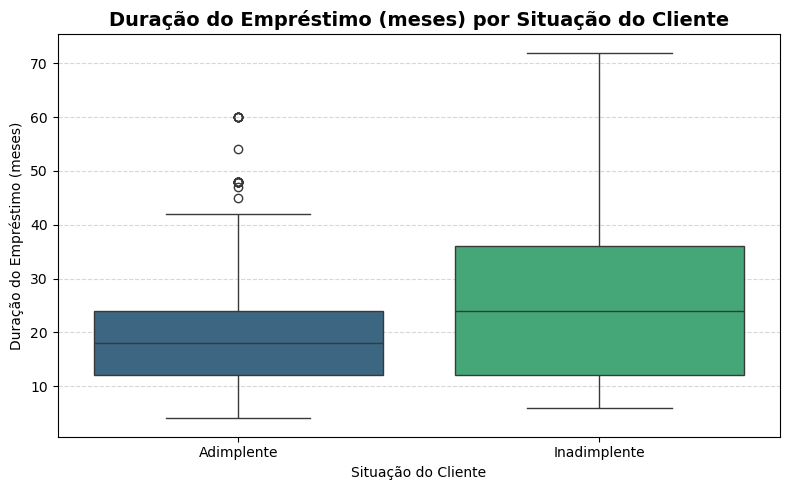

In [22]:
eda_numerica_target(
    df,
    coluna="duration_months",
    titulo_coluna="Duração do Empréstimo (meses)"
)

### Duração do Empréstimo (meses) × Situação do Cliente

**Insight principal:**  
Clientes inadimplentes tendem a apresentar prazos de empréstimo mais longos em comparação aos clientes adimplentes. Observa-se uma mediana superior e maior concentração de contratos de longa duração entre inadimplentes.

**Análise adicional:**  
Prazos mais extensos aumentam a exposição ao risco ao longo do tempo, tornando o contrato mais sensível a mudanças na capacidade de pagamento do cliente, como perda de renda ou eventos inesperados.

**Implicações para o modelo:**  
- A duração do empréstimo é uma variável relevante para a predição de risco  
- Pode apresentar relação monotônica com a inadimplência  
- Deve ser considerada em conjunto com valor do crédito para capturar efeitos de alavancagem

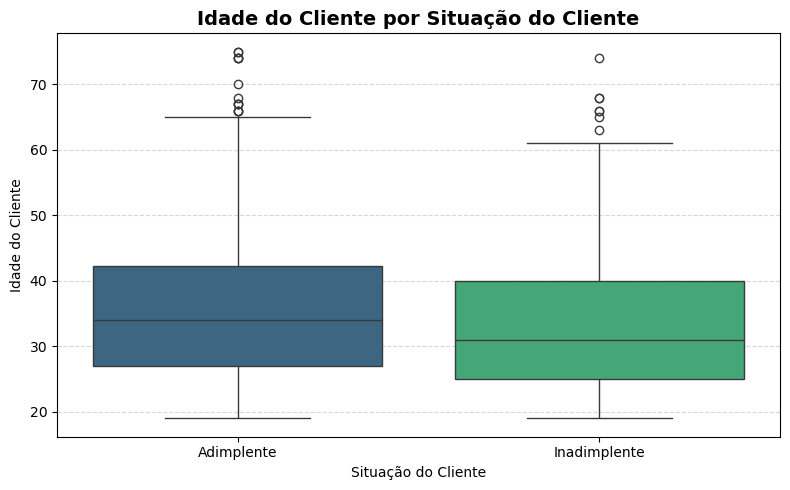

In [24]:
eda_numerica_target(
    df,
    coluna="age",
    titulo_coluna="Idade do Cliente"
)

### Idade do Cliente × Situação do Cliente

**Insight principal:**  
Clientes inadimplentes tendem a apresentar idade média ligeiramente inferior em comparação aos clientes adimplentes. Observa-se maior concentração de inadimplência em faixas etárias mais jovens, enquanto clientes mais velhos demonstram comportamento mais estável de pagamento.

**Análise adicional:**  
Clientes mais jovens podem apresentar menor histórico financeiro e menor estabilidade de renda, fatores que aumentam a vulnerabilidade ao risco de crédito. Em contrapartida, faixas etárias mais elevadas tendem a possuir maior previsibilidade financeira.

**Implicações para o modelo:**  
- A idade possui relação relevante, embora moderada, com o risco de crédito  
- Pode capturar efeitos indiretos de maturidade financeira e estabilidade  
- Deve ser utilizada com cautela para evitar vieses, preferencialmente em conjunto com variáveis de renda e emprego